In [129]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.mlab as mlb
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# read data

df = pd.read_csv(r'C:\Users\PC\Desktop\murillo\curso\sql portf\python\movies.csv')

In [130]:
#lets look at the date
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [131]:
#cheack if have missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}'.format(col,pct_missing))


name - 0.0
rating - 0.010041731872717789
genre - 0.0
year - 0.0
released - 0.0002608242044861763
score - 0.0003912363067292645
votes - 0.0003912363067292645
director - 0.0
writer - 0.0003912363067292645
star - 0.00013041210224308815
country - 0.0003912363067292645
budget - 0.2831246739697444
gross - 0.02464788732394366
company - 0.002217005738132499
runtime - 0.0005216484089723526


In [132]:
#data types for our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [133]:
#check if have some null

#df[df.budget.isnull()].shape


#2 
df[df.gross.isnull()].shape



(189, 15)

In [134]:
#change the nan for 0
df['budget'] = df['budget'].fillna('0')
df['gross'] = df['gross'].fillna('0')

In [135]:
#change data type of columns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [136]:
df.head(1)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0


In [137]:
#create a colum year
df['year'] = df['released'].astype(str).str[-20:-16].head(50)

In [138]:
df.sort_values(by=['gross'], inplace=False, ascending=False).head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,NaN,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,NaN,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,NaN,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,NaN,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,NaN,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [139]:
df['company'].drop_duplicates().sort_values(ascending=+True).shape

(2386,)

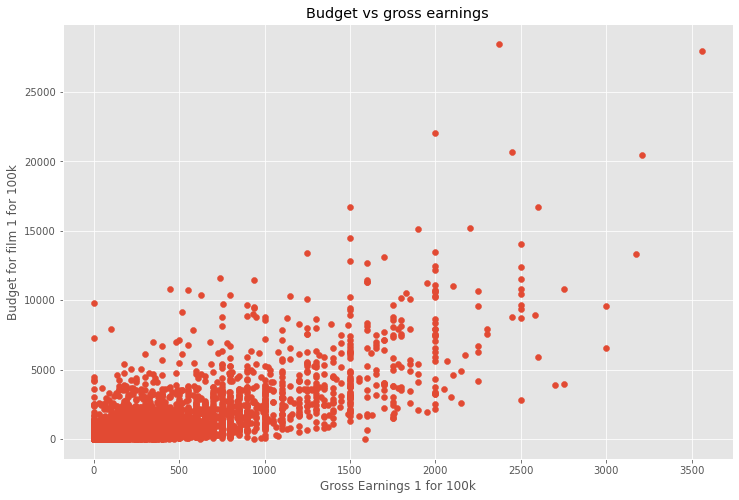

In [140]:
plt.scatter(x=df.budget/100000, y=df.gross/100000)
plt.title('Budget vs gross earnings')

plt.xlabel('Gross Earnings 1 for 100k')

plt.ylabel('Budget for film 1 for 100k')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

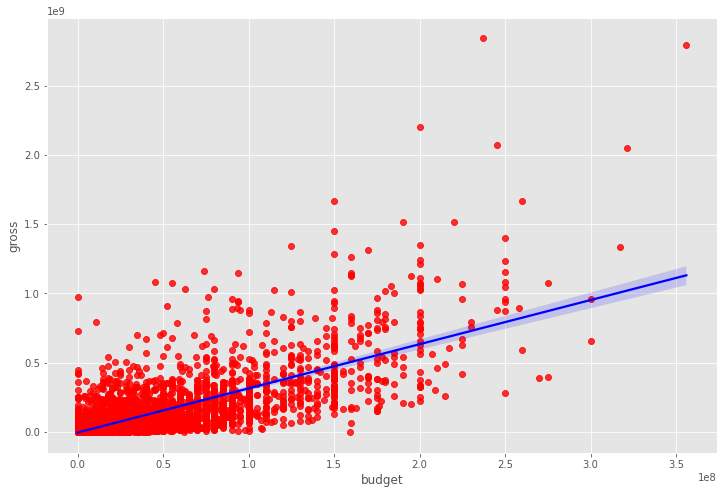

In [141]:
sns.regplot(x='budget', y='gross', data =df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [142]:
# what's the correct correlation
df.corr(method='pearson')
#have a big correlation


,score,votes,budget,gross,runtime
score,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.399451,0.309212,0.269510,0.245235,1.000000


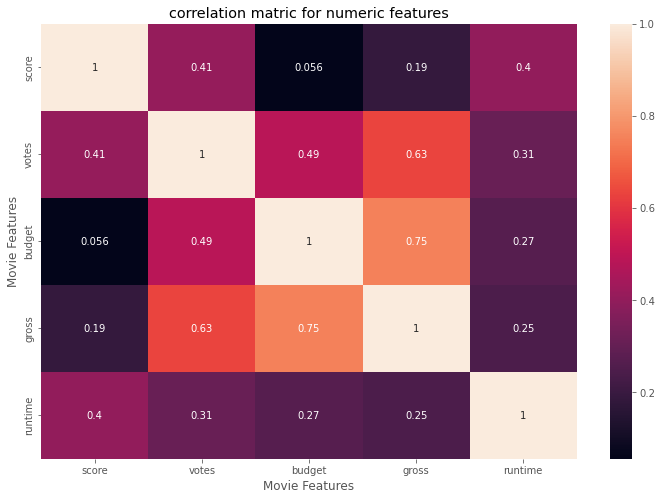

In [143]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('correlation matric for numeric features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [156]:
df_numerized =df

#company code
df_numerized['company_code'] = df_numerized['company'].astype('category')
df_numerized['company_code'] = df_numerized['company_code'].cat.codes
#genre code
df_numerized['genre_code'] = df_numerized['genre'].astype('category')
df_numerized['genre_code'] = df_numerized['genre_code'].cat.codes

In [161]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()
corr_pairs

score         score           1.000000
              votes           0.409182
              budget          0.055665
              gross           0.186392
              runtime         0.399451
              company_code    0.001030
              genre_code      0.027965
votes         score           0.409182
              votes           1.000000
              budget          0.486862
              gross           0.632834
              runtime         0.309212
              company_code    0.133204
              genre_code     -0.145307
budget        score           0.055665
              votes           0.486862
              budget          1.000000
              gross           0.750157
              runtime         0.269510
              company_code    0.186474
              genre_code     -0.334021
gross         score           0.186392
              votes           0.632834
              budget          0.750157
              gross           1.000000
              runtime    

In [162]:
 # the best relacion from Score is the runtime 
    